# Helpful Python Scripts

## Basics

### If you want to comment a line in the script put a #
### In Jupyter to execute a command press Shift + Enter
### Certain scripts need certain libraries (this is the part that says, "import blank as abrreviated"
### When you open a notebook that you come back to don't forget to execute the code again because many times you may want to add code that uses some of the previous work 
### If you sometimes find code online they use Python 2.7, so when they say "print blank" in Python 3.5 you need to put "print (blank)"

## Uploading a file

In [1]:
#save Excel spreadsheets as csv's instead, helps prevent from formatting errors
import pandas as pd

#pandas reads the csv file, the only thing that will obviously change is the file location, I named this "original"
original = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2.csv")

#I like to print the shape to make sure it downloaded properly, shows the (#columns, #rows)
print (original.shape) 

#This command is saying take the original and output first few rows, if interested in last put .tail()
original.head()

(3653, 13)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,earlydate,dollar,crude,corn,urea,latestdate,crude.1,urea.1
0,3/1/12,78.789,109.27,654.00,406,1/1/96,84.76,19.06,371.50,235,2/1/14,96.71,450
1,3/2/12,79.403,107.17,655.00,411,1/2/96,84.69,19.24,376.00,235,2/2/14,96.71,450
2,3/3/12,79.403,107.17,655.00,NaN,1/3/96,85.11,19.34,377.50,235,2/3/14,95.72,450
3,3/4/12,79.403,107.17,655.00,NaN,1/4/96,85.22,19.37,373.00,235,2/4/14,96.46,450
4,3/5/12,79.300,107.18,660.75,409,1/5/96,85.06,19.65,369.75,235,2/5/14,96.76,450


## How to choose which columns/rows you are interested in and how to deal with missing data

In [2]:
#now I make a variable called "china" which is interested in the columns 'latedate, spotdollar->2monthurea, 
#and I'm interested in the rows starting from 8/1/15 on which corresponds to [1248:1457]
china = original[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea']][1248:1457]

#now I wanted to drop all the rows that had missing values, if wanted to fill missing with mean the code is:
# china.fillna(china.mean(axis=0))
chinanew = china.dropna()
print(chinanew.shape)

(141, 5)


## Grouping and finding certain attribute

In [6]:
#I'm just loading an example file
wc= pd.read_csv("C:/Users/msteinme/Documents/corn2.csv")

#so there are multiple states in the file so this command is saying use only Colorado
co=wc[wc['State']=='CO']
print(co)                    #if separated the two inputs you wouldn't have to say print(co), you could just put co and
                             #it would look better

#planted amount grouped by state
groupall=wc['Planted'].groupby(wc['State']).sum()
groupall

#this looks nicer if you find colorado in one input and the grouping command as another input 

   Year State   Planted  Acres treated with N  acres treated with P  \
0  1998    CO  1179.248                95.085                68.010   
1  1999    CO  1231.005                97.765                62.889   
2  2000    CO  1348.328                94.611                78.412   
3  2001    CO  1219.856                   NaN                   NaN   
4  2005    CO  1100.402                90.367                67.521   
5  2010    CO  1329.949                97.717                   NaN   

   acres treated with K  N applied  P applied  K applied  PDSI  Precip  \
0                   NaN     98.166     21.550        NaN  3.18   18.77   
1                15.790    138.141     38.186     17.025  1.03   20.03   
2                   NaN    142.775     39.903        NaN -2.31   16.91   
3                   NaN        NaN     41.078        NaN -2.69   16.81   
4                20.294    125.608     35.262        NaN  0.69   18.95   
5                   NaN    130.711     29.478        NaN  

State
CO     7408.788
GA      833.251
IA    99701.660
IL    90497.639
IN    46504.877
KS    24000.726
KY     9035.406
MI    18783.995
MN    57798.760
MO    22751.193
NC     5691.278
ND     5403.123
NE    69149.117
NY     4049.685
OH    27200.351
PA     8750.434
SC      399.619
SD    32407.119
TX    14504.813
WI    29600.524
Name: Planted, dtype: float64

## General Graph to look at trend

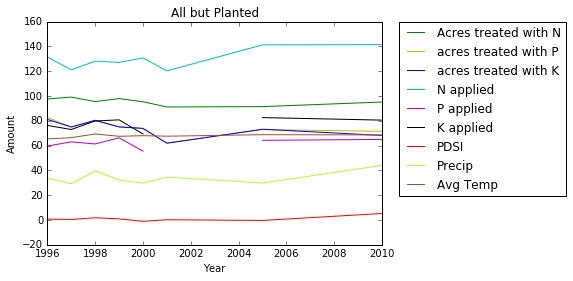

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#Makesure you say this code otherwise your figure will output seperately, not on the notebook
%matplotlib inline

wci=wc[['Year','Planted', 'Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]

#the year will be on the x axis
x1= (wci['Year'])

#there will be separate lines for planted, acres treated with N, etc
y1=(wci['Planted'])
y2=(wci['Acres treated with N'])
y3=(wci['acres treated with P'])
y4=(wci['acres treated with K'])
y5=(wci['N applied'])
y6=(wci['P applied'])
y7=(wci['K applied'])
y8=(wci['PDSI'])
y9=(wci['Precip'])
y10=(wci['Avg Temp'])

#the plt.figure plots just one figure, if wanted all the variables to have their own figure then above each of the 
# plt.plt() you would have to put plt.figure()
plt.figure()
plt.plot(x1,y2,'g') #plt.plot(xaxis variable, y variable, 'color')
plt.plot(x1,y3,'y')
plt.plot(x1,y4,'b')
plt.plot(x1,y5,'c')
plt.plot(x1,y6,'m')
plt.plot(x1,y7,'k')
plt.plot(x1,y8,'r')
plt.plot(x1,y9,'#adff2f')
plt.plot(x1,y10,'#a0522d')
plt.xlabel('Year') #labels x axis
plt.ylabel('Amount') #labels y axis
plt.title('All but Planted') #gives title
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #this puts the legend off of the graph
plt.show() #this says print the graph

## Descriptive Statistics

In [10]:
chinanew.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,141.000000,141.000000,141.00000,141.000000
mean,97.275035,40.698582,377.83156,241.517730
std,1.598827,5.966633,11.87406,23.041764
min,93.332000,28.350000,357.50000,188.000000
25%,95.985000,35.200000,369.00000,228.000000
50%,97.288000,42.410000,375.00000,245.000000
75%,98.725000,45.920000,387.25000,254.000000
max,100.170000,50.140000,408.50000,283.000000


## Boxplot

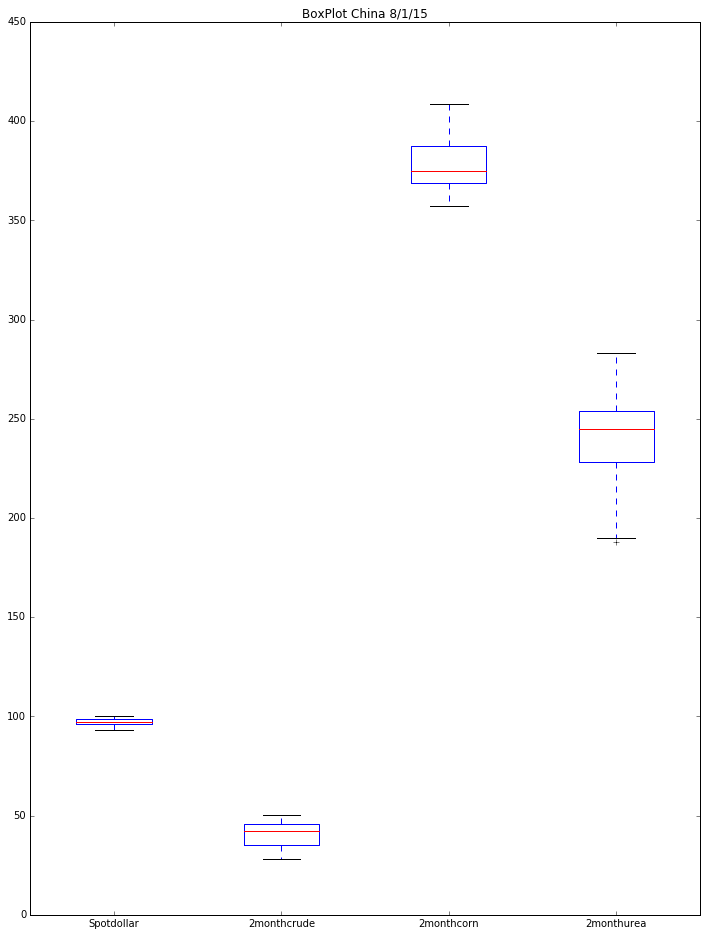

In [11]:
#check normality and outlier using boxplot
#to change the size, figsize=(x dimension, y dimension)
plt.show(chinanew.plot(kind='box', figsize=(12,16),title=('BoxPlot China 8/1/15')))

## Correlations

In [12]:
#pearson correlation matrix, the standard
chinanew.corr()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
Spotdollar,1.000000,-0.414365,-0.505570,-0.589453
2monthcrude,-0.414365,1.000000,0.639765,0.772332
2monthcorn,-0.505570,0.639765,1.000000,0.458310
2monthurea,-0.589453,0.772332,0.458310,1.000000


In [13]:
#spearman correlation, nonparametric, outliers don't affect, 
#first array is correlation coefficient and second array shows p-values
from scipy import stats
stats.spearmanr(chinanew.corr())

SpearmanrResult(correlation=array([[ 1. , -0.4, -0.4, -0.8],
       [-0.4,  1. ,  0.4,  0.8],
       [-0.4,  0.4,  1. ,  0.2],
       [-0.8,  0.8,  0.2,  1. ]]), pvalue=array([[ 0. ,  0.6,  0.6,  0.2],
       [ 0.6,  0. ,  0.6,  0.2],
       [ 0.6,  0.6,  0. ,  0.8],
       [ 0.2,  0.2,  0.8,  0. ]]))

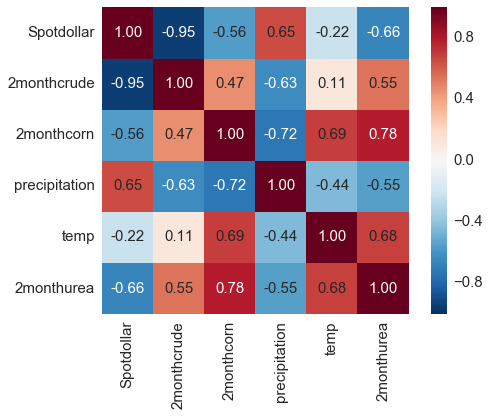

In [15]:
original_2 = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2csv.csv")
prectemp = original_2[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', 'precipitation', 'temp','2monthurea']][0:1403]
prec_temp = prectemp.dropna()
prec_temp.tail()

import numpy as np
import seaborn as sns

#heat matrix code
#cols is used to label x and y axis on matrix
cols= ['Spotdollar', '2monthcrude', '2monthcorn','precipitation', 'temp','2monthurea']
cm = np.corrcoef(prec_temp[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

## Scatterplots

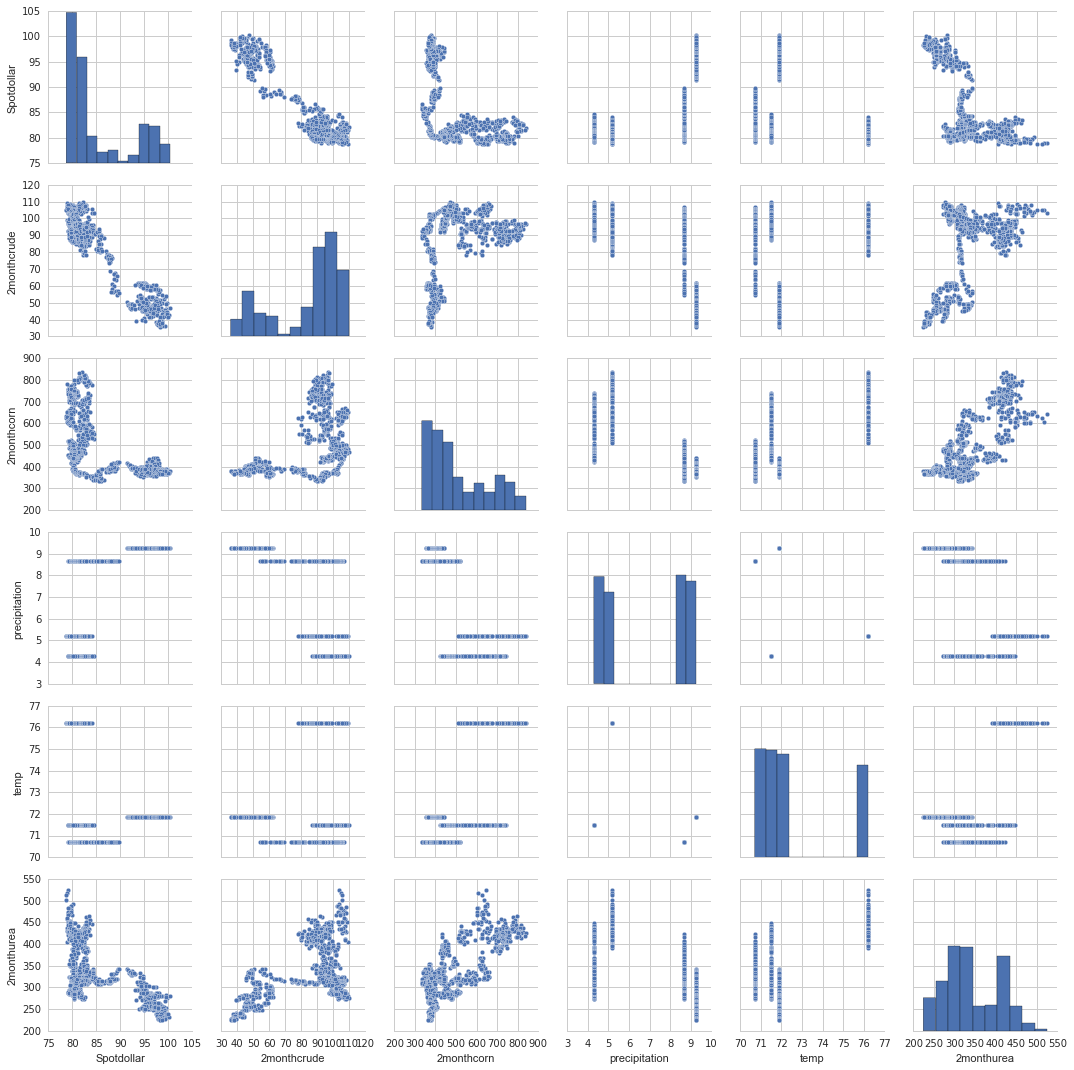

In [16]:
#scatterplot matrix
sns.set(style='whitegrid', context='notebook')
sns.pairplot(prec_temp, size=2.5);
plt.show()

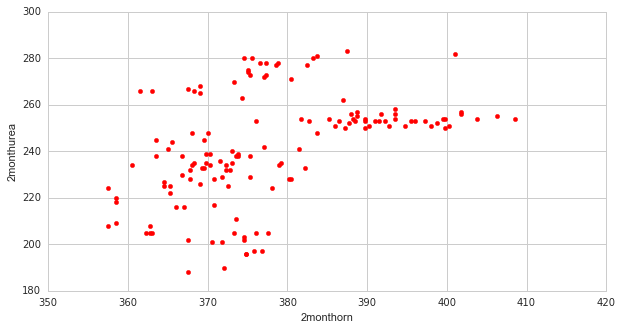

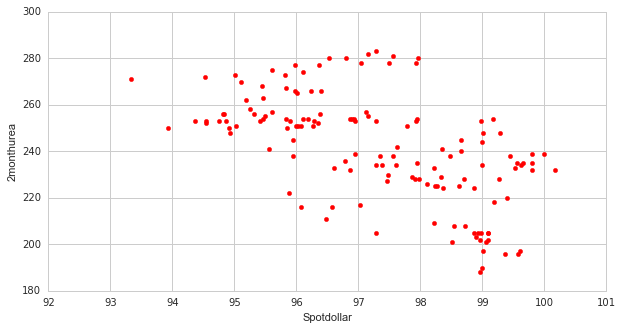

In [17]:
#individual scatterplots
plt.figure(figsize=(10,5))#need to use this command before each scatter otherwise all the scatterplots will be on one
plt.xlabel('2monthorn')
plt.ylabel('2monthurea')
plt.scatter(chinanew['2monthcorn'],chinanew['2monthurea'], color = 'r')

plt.figure(figsize=(10,5))
plt.xlabel('Spotdollar')
plt.ylabel('2monthurea')

#this line says from chinanew put spotdollar values as x axis and 2monthurea as the y
plt.scatter(chinanew['Spotdollar'],chinanew['2monthurea'],color = 'r')

## Histograms

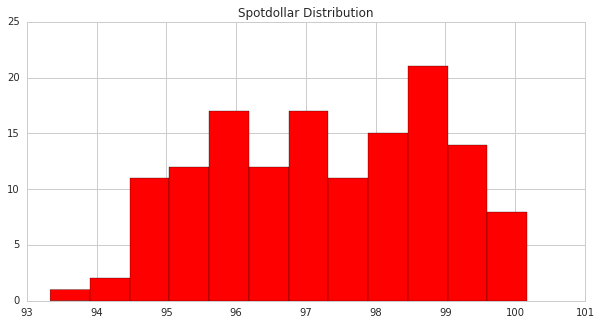

In [19]:
plt.figure(figsize=(10,5))
plt.hist(chinanew['Spotdollar'],bins=12, color='r') #bins should=sqrt(#obs) 
plt.title('Spotdollar Distribution')

## Subplots

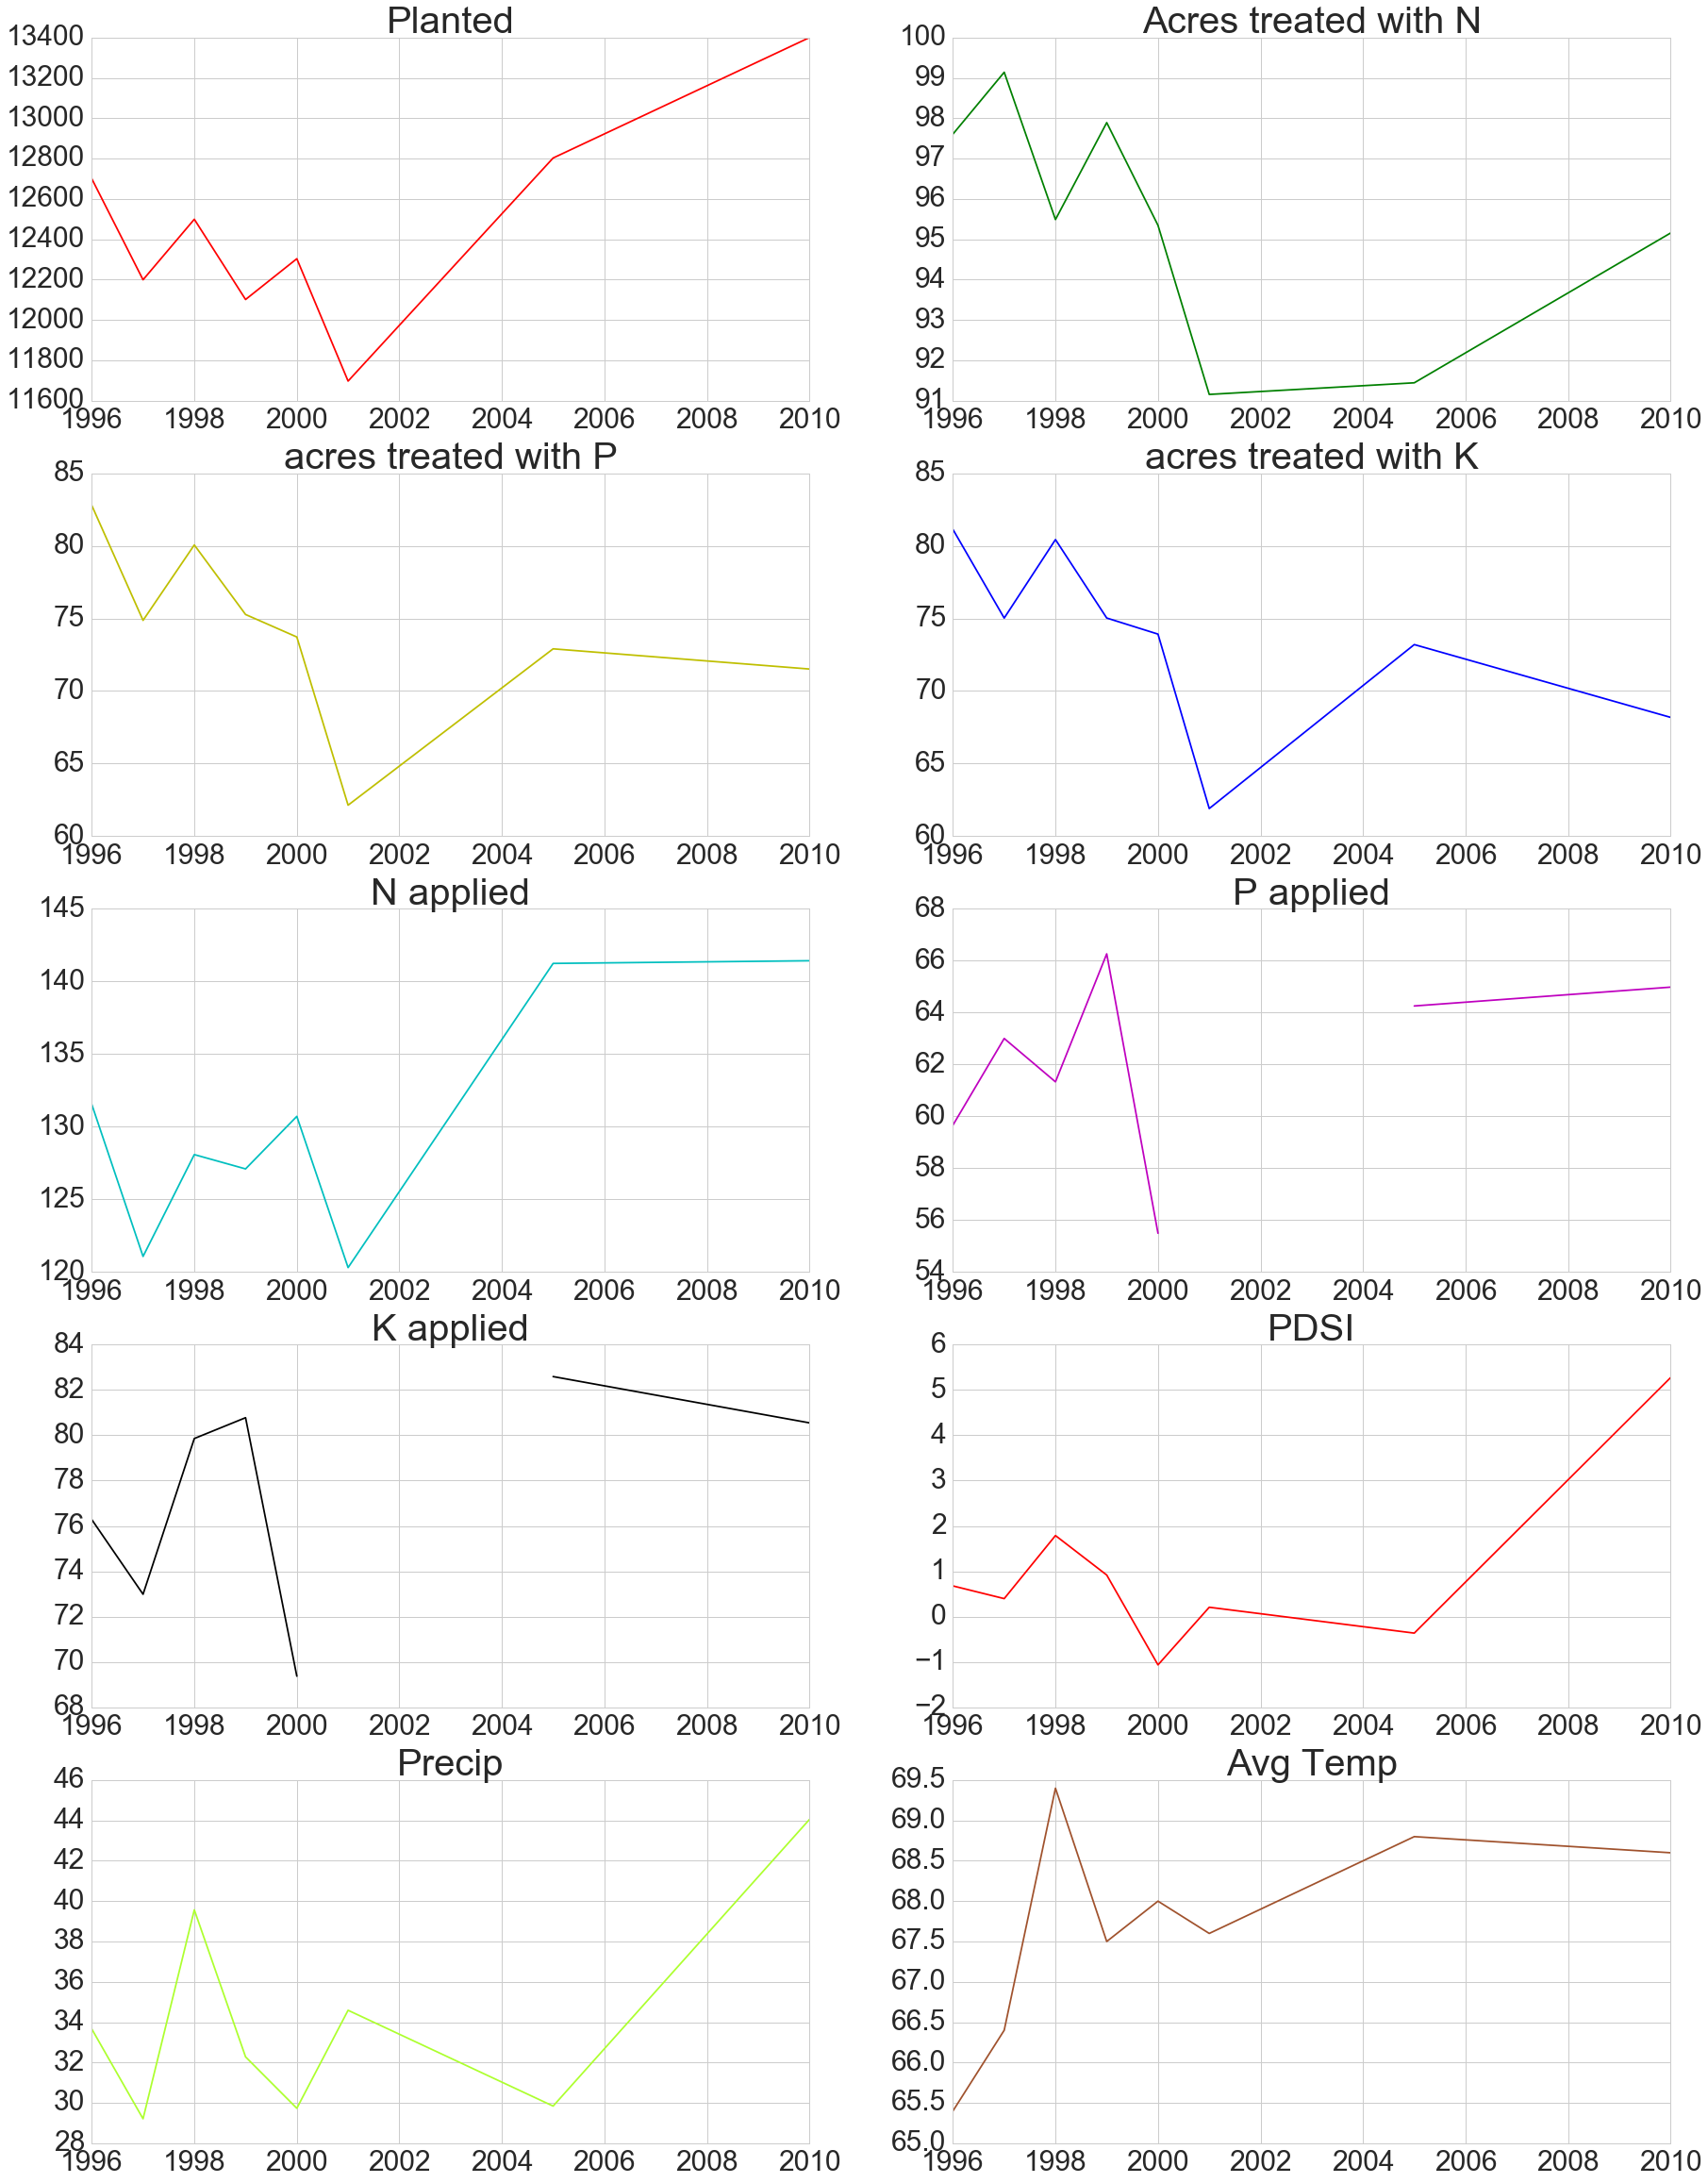

In [27]:
#this gives the size of the whole picture(all the subplots together)
fig=plt.figure(figsize=(30,40))

#there are 10 subplots so (521)-> (# sublot in y, # subplot in x, the plot spot)
ax1= fig.add_subplot(521)
ax2= fig.add_subplot(522)
ax3= fig.add_subplot(523)
ax4= fig.add_subplot(524)
ax5= fig.add_subplot(525)
ax6= fig.add_subplot(526)
ax7= fig.add_subplot(527)
ax8= fig.add_subplot(528)
ax9= fig.add_subplot(529)
ax10= fig.add_subplot(5,2,10)


ax1.set_title('Planted',size=(40))
ax2.set_title('Acres treated with N',size=(40))
ax3.set_title('acres treated with P',size=(40))
ax4.set_title('acres treated with K',size=(40))
ax5.set_title('N applied',size=(40))
ax6.set_title('P applied',size=(40))
ax7.set_title('K applied',size=(40))
ax8.set_title('PDSI',size=(40))
ax9.set_title('Precip',size=(40))
ax10.set_title('Avg Temp',size=(40))

#helping with formatting the size, etc.
ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30)
ax4.tick_params(axis='y', which='major', labelsize=30)
ax5.tick_params(axis='x', which='major', labelsize=30)
ax5.tick_params(axis='y', which='major', labelsize=30)
ax6.tick_params(axis='x', which='major', labelsize=30)
ax6.tick_params(axis='y', which='major', labelsize=30)
ax7.tick_params(axis='x', which='major', labelsize=30)
ax7.tick_params(axis='y', which='major', labelsize=30)
ax8.tick_params(axis='x', which='major', labelsize=30)
ax8.tick_params(axis='y', which='major', labelsize=30)
ax9.tick_params(axis='x', which='major', labelsize=30)
ax9.tick_params(axis='y', which='major', labelsize=30)
ax10.tick_params(axis='x', which='major', labelsize=30)
ax10.tick_params(axis='y', which='major', labelsize=30)

#plots each of the subplots
ax1.plot(x1,y1,'r')
ax2.plot(x1,y2,'g')
ax3.plot(x1,y3,'y')
ax4.plot(x1,y4,'b')
ax5.plot(x1,y5,'c')
ax6.plot(x1,y6,'m')
ax7.plot(x1,y7,'k')
ax8.plot(x1,y8,'r')
ax9.plot(x1,y9,'#adff2f')
ax10.plot(x1,y10,'#a0522d')

plt.show()

## OLS Regression and Outlier Diagnostics

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#the variables you are interested in
X = chinanew[['Spotdollar','2monthcrude', '2monthcorn']]

#what you want to predict
Y = chinanew[['2monthurea']]

X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     111.3
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           1.47e-36
Time:                        13:52:13   Log-Likelihood:                -554.88
No. Observations:                 141   AIC:                             1118.
Df Residuals:                     137   BIC:                             1130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         829.0302    100.691      8.233      0.000       629.922  1028.139
Spotdollar     -5.6036      0.777     -7.211      0.000        -7.140    -4.067
2monthcrude     2.9012      0.234     12.412      0.000         2.439     3.363
2monthcorn     -0.4248      0.124     -3.428      0.001        -0.670    -0.180
==============================================================================
Omnibus:                       16.689   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.712
Skew:                           0.832   Prob(JB):                     8.65e-05
Kurtosis:                       3.646   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


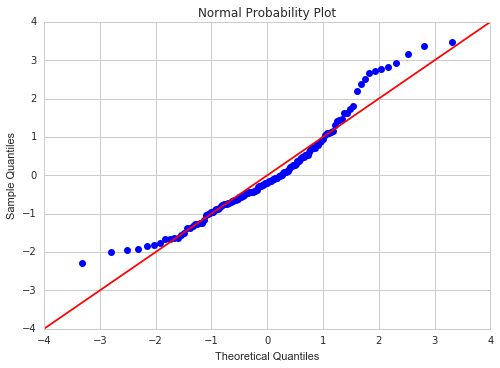

In [21]:
#normal probability plot
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [22]:
#diagnostic statistics worrisome when cooks>4/n, abs(dfits)>2*sqrt(k/n), hat>3*k/n, large residual

infl=est.get_influence()
infl.summary_table()

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,278.0,254.960250477,0.0149227383723,1.84984883159,0.0171445343547,0.244317321304,1.86654355749,0.246522264023
1.0,278.0,253.209398689,0.0196465415321,1.99271795574,0.0194063346892,0.280332242399,2.01484667241,0.283445273397
2.0,280.0,249.463921243,0.0262871008922,2.45178325985,0.0171912535314,0.324265945743,2.49824206175,0.330410455979
3.0,281.0,248.01255027,0.0214548422132,2.64183613148,0.0121469131514,0.292949430538,2.70189878952,0.299609692792
4.0,282.0,246.720590815,0.093612722004,2.87124452899,0.0434473586307,0.611923923389,2.9509100596,0.628902360285
5.0,283.0,246.527850325,0.0293981772204,2.92302752205,0.0135761969428,0.342917933158,3.00763627007,0.352843894094
6.0,280.0,253.735043599,0.0147074180985,2.10448308189,0.0131091542283,0.242548288788,2.13152474898,0.245664925901
7.0,280.0,250.526347311,0.0163034961675,2.35974786808,0.011575849726,0.255370289325,2.40040860894,0.259770566701
8.0,278.0,250.106811381,0.0119678009899,2.2309002913,0.00952701098997,0.218794890159,2.26425157148,0.222065807157


## Machine Learning

 1)Spotdollar                     0.324187
 2)2monthcrude                    0.322445
 3)2monthcorn                     0.322255
 4)precipitation                  0.018489
 5)temp                           0.012624


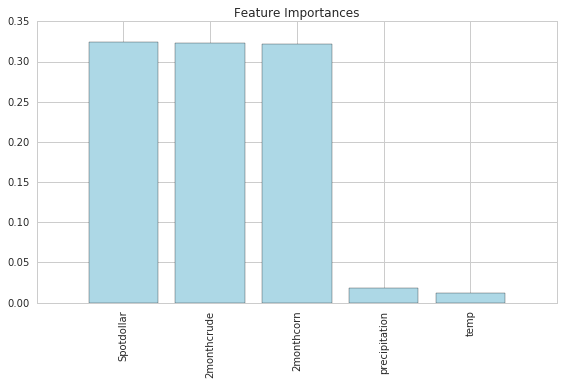

In [24]:
#shows which variables are the most important and has corresponding graph, this code takes a while to process
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split 

#the X and Y are just taking the values of the colums of interest
X=prec_temp[['Spotdollar', '2monthcrude', '2monthcorn','precipitation', 'temp']].values
y=prec_temp['2monthurea'].values

#usually want test size from 0.3-0.4
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=1)

#random_state can equal any number you want, n_jobs=-1 means it looks at all values
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

#this is saying the labels are the columns 1 to the last column label in prec_temp
feat_labels = prec_temp.columns[1:]
importances= forest.feature_importances_

#this is saying put the variable of most importance first, descending from there
indices= np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print("%2d)%-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices], color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)

#if you don't put this below command then the graph will be more spaced and not look as good
plt.tight_layout()
plt.show()

MSE train: 27.280, test: 252.952
R^2 train: 0.994, test: 0.938


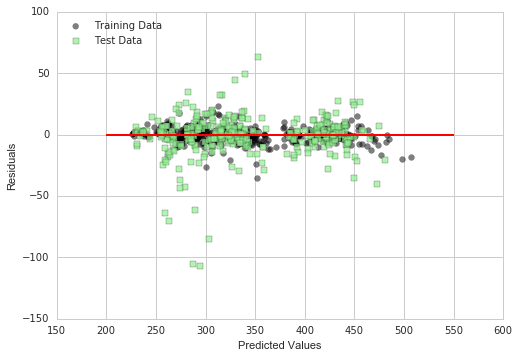

In [26]:
#tend to overfit training data so now look at residuals of the prediction
#comparing training set to test set
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=prec_temp[['Spotdollar', '2monthcrude', '2monthcorn','precipitation', 'temp']].values
y=prec_temp['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=1)
forest=RandomForestRegressor(n_estimators=1000, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

#graph
plt.scatter(y_train_pred, y_train_pred-y_train, c='black', marker='o', s=35, alpha=0.5, label= 'Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left') #puts the legend in the upper left
plt.hlines(y=0, xmin=200, xmax=550, lw=2, color='red')
plt.xlim=([200,550]) #giving x axis limits
plt.show()